# Student Performance Indicator

## Problem Statement:
The goal of this project is to understand the influence of the parents background,test,prepration,
and various other variables   

## Data Collection
Data source :from kaggle

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Reading a dataset

In [4]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [5]:
## Top 5 records
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [8]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
df.shape

(1000, 8)

In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

## 2.Dataset Information

## 3.Data checks to perform

## 3.1 checking null values

In [13]:

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### NO null values

## 3.2 checking duplicates 

In [14]:
df.duplicated().sum()

0

### No duplicates

## 3.3 checking datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the no of unique values of each column

In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Checking Statistics of data set


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

## 3.6 Exploring Data


In [18]:
print("Categories in 'gender' varible:  ",end=' ')
print(df['gender'].unique())

Categories in 'gender' varible:   ['female' 'male']


In [19]:
print("Categories in 'race/ethnicity ' varible:  ",end=' ')
print(df['race/ethnicity'].unique())

Categories in 'race/ethnicity ' varible:   ['group B' 'group C' 'group A' 'group D' 'group E']


In [20]:
print("Categories in 'parental level of education' varible:  ",end=' ')

print(df['parental level of education'].unique())



Categories in 'parental level of education' varible:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [21]:
print("Categories in 'lunch' varible:  ",end=' ')

print(df['lunch'].unique())


Categories in 'lunch' varible:   ['standard' 'free/reduced']


In [22]:

print("Categories in 'test preparation course  ' varible:  ",end=' ')

print(df['test preparation course'].unique())

Categories in 'test preparation course  ' varible:   ['none' 'completed']


In [23]:
## defining numeric and categorical feature
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
##print values
print("we have {} numerical features: {}".format(len(numeric_features),numeric_features))

print("we have {} numerical features: {}".format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 numerical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.7 Adding columns for "Total score " and Average
#### Feature Engineering

In [24]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
reading_full_marks=df[df['reading score']==100]['average'].count()
writing_full_marks=df[df['writing score']==100]['average'].count()
math_full_marks=df[df['math score']==100]['average'].count()


print(f"Number of Students with full marks in math's :{math_full_marks}")

print(f"Number of Students with full marks in reading :{reading_full_marks}")

print(f"Number of Students with full marks in writing :{writing_full_marks}")


Number of Students with full marks in math's :7
Number of Students with full marks in reading :17
Number of Students with full marks in writing :14


In [26]:

reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(f"Number of Students with less than 20 marks in math's :{math_less_20}")

print(f"Number of Students with less than 20 marks in reading :{reading_less_20}")

print(f"Number of Students with less than 20 marks in writing :{writing_less_20}")

Number of Students with less than 20 marks in math's :4
Number of Students with less than 20 marks in reading :1
Number of Students with less than 20 marks in writing :3


## 4. Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion


In [27]:
#4.1.1 Histogram and KDE

<Axes: xlabel='total_score', ylabel='Count'>

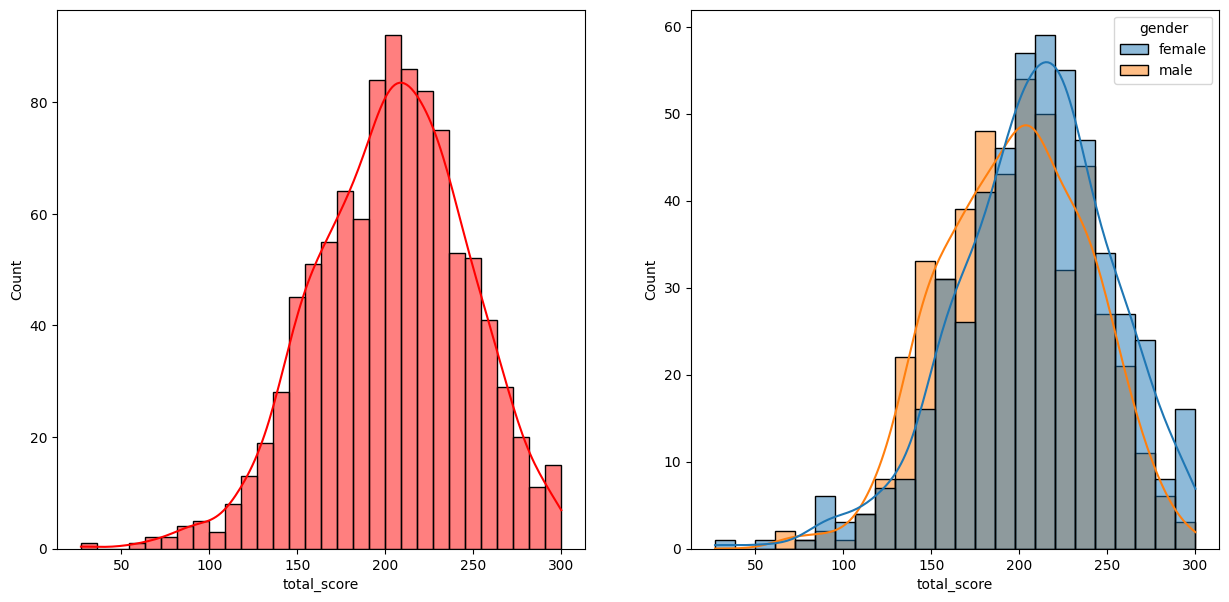

In [28]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

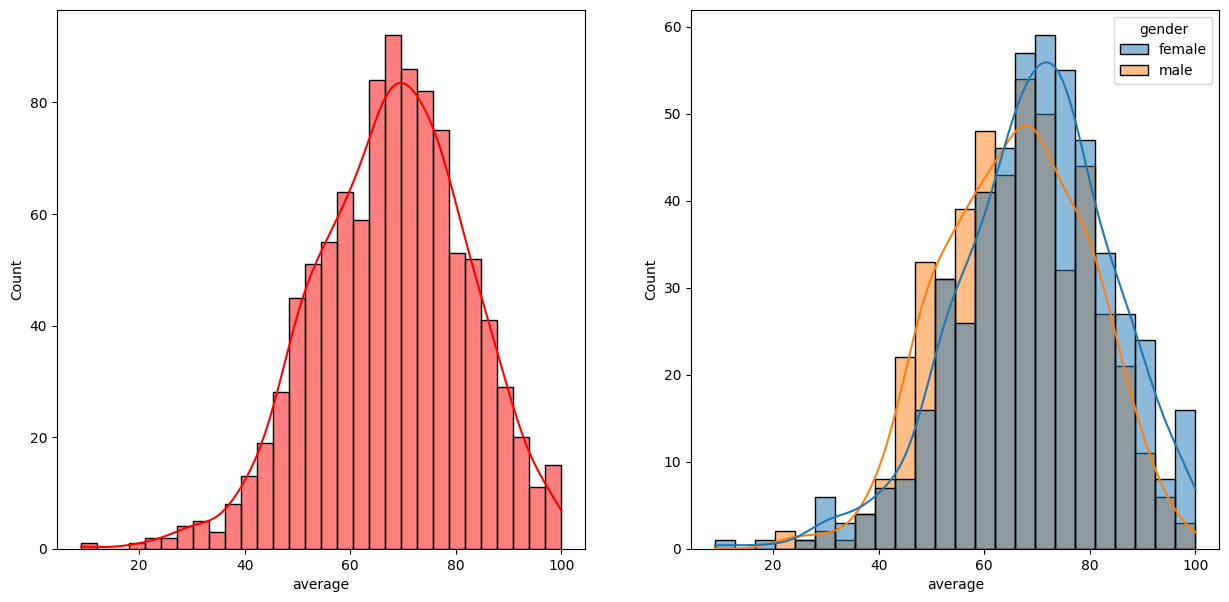

In [29]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

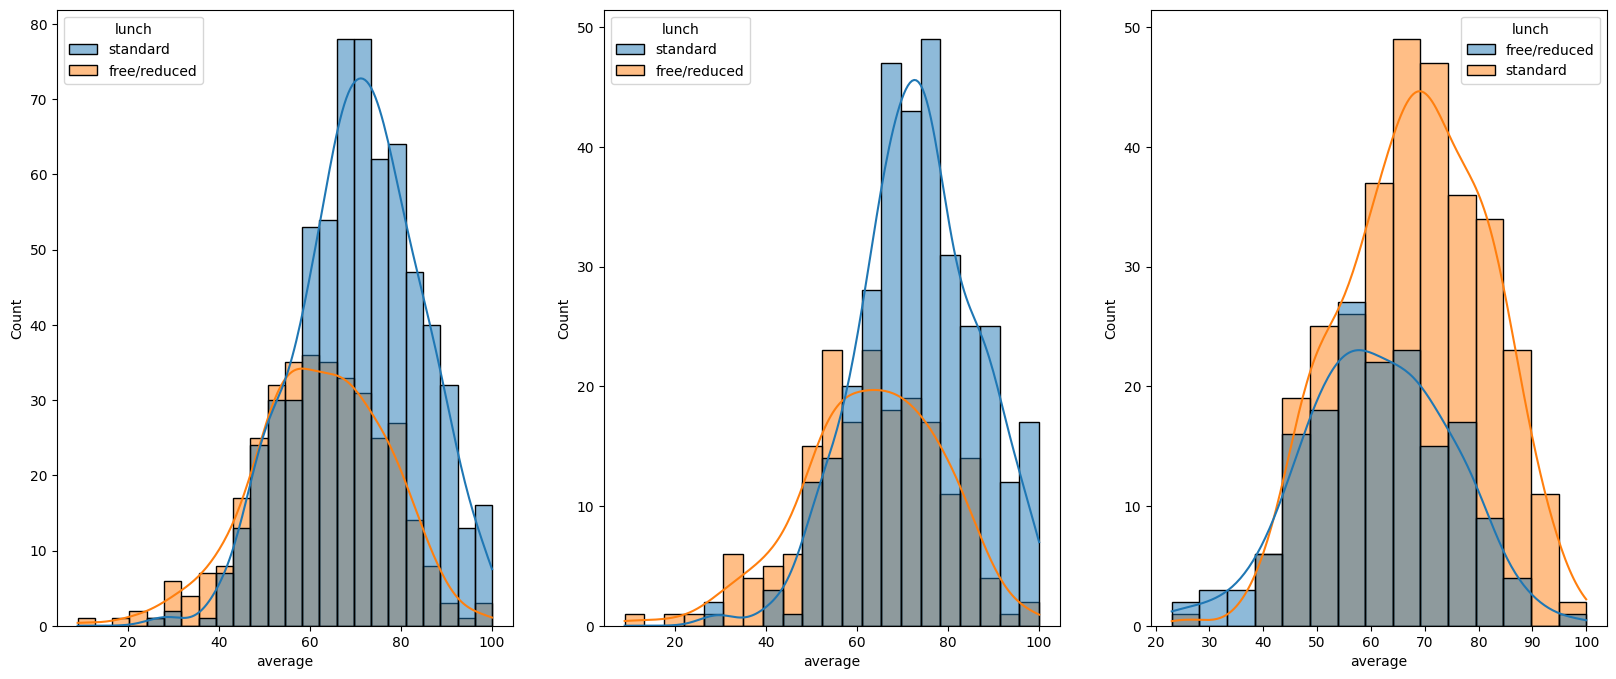

In [30]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

## Insights
1.Standard lunch helps perform well in exams
2. standard lunch helps perform well in exams for female and as well as male



<Axes: xlabel='math score', ylabel='Count'>

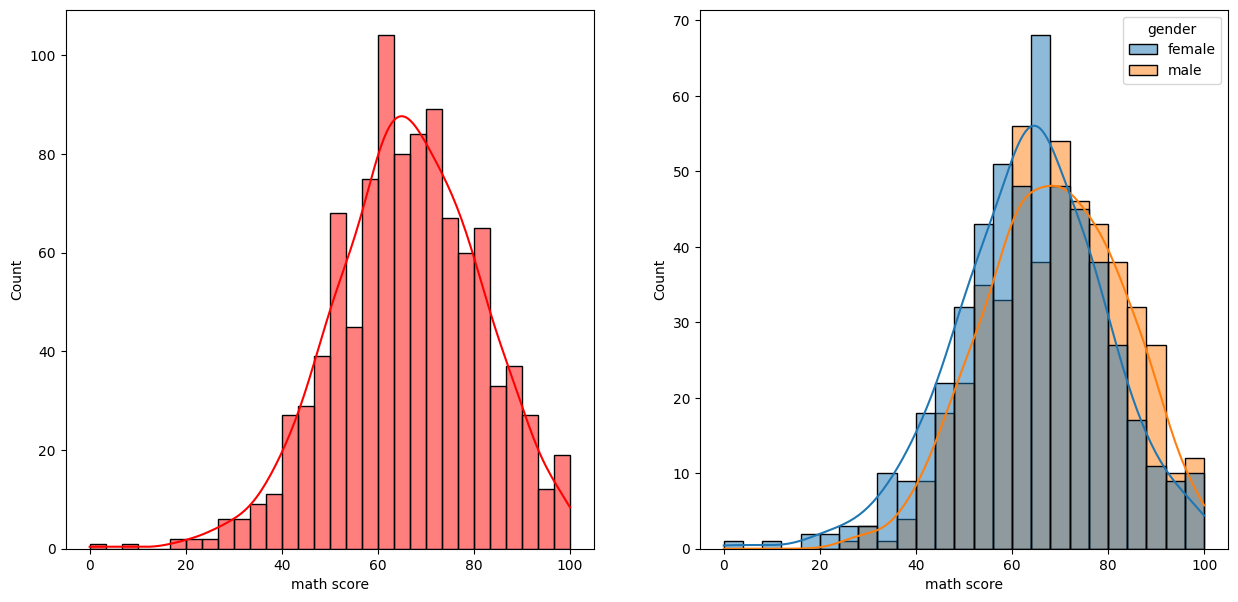

In [31]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='math score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='math score',kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

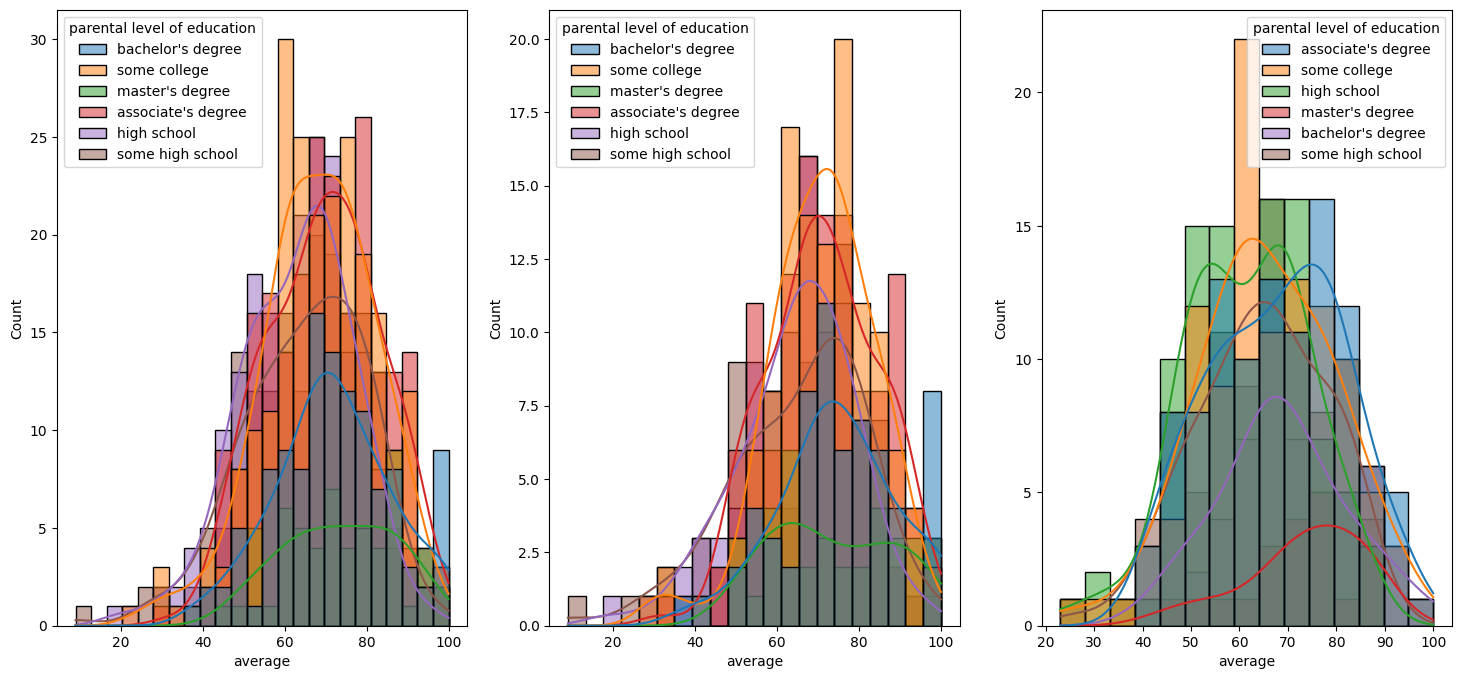

In [32]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

<Axes: xlabel='average', ylabel='Count'>

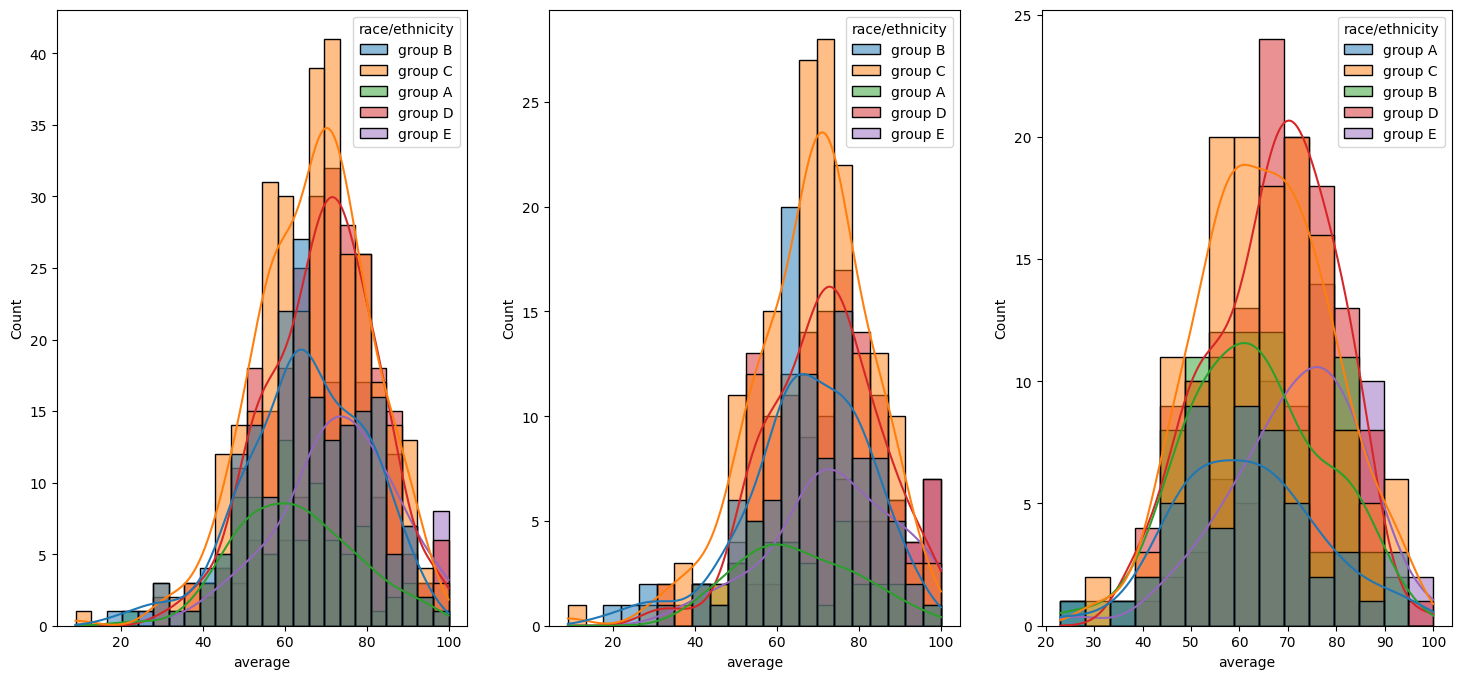

In [33]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

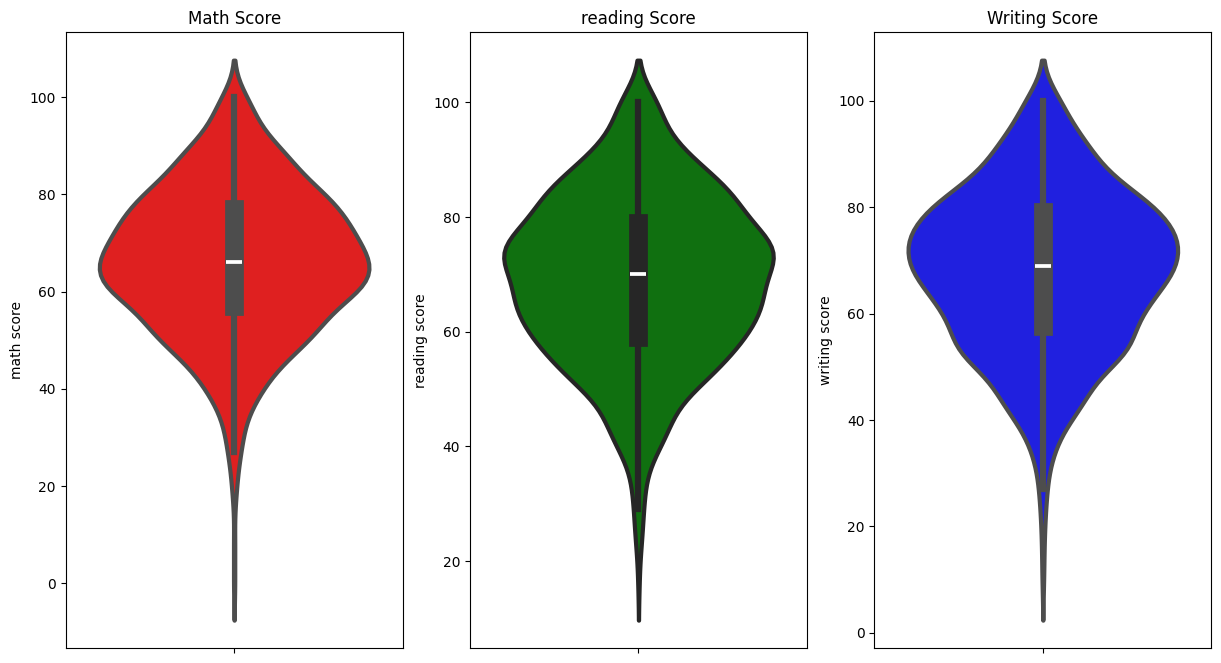

In [76]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score',data=df,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading Score')
sns.violinplot(y='reading score',data=df,color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score',data=df,color='b',linewidth=3)




In [84]:
##Insight
#From the above 3 plots its clearly visible that the most of the students scores b/w 60-80 in Maths
#where as in reading and writing most of them score from 50-80

<Axes: title={'center': 'Writing Score'}, xlabel='writing score'>

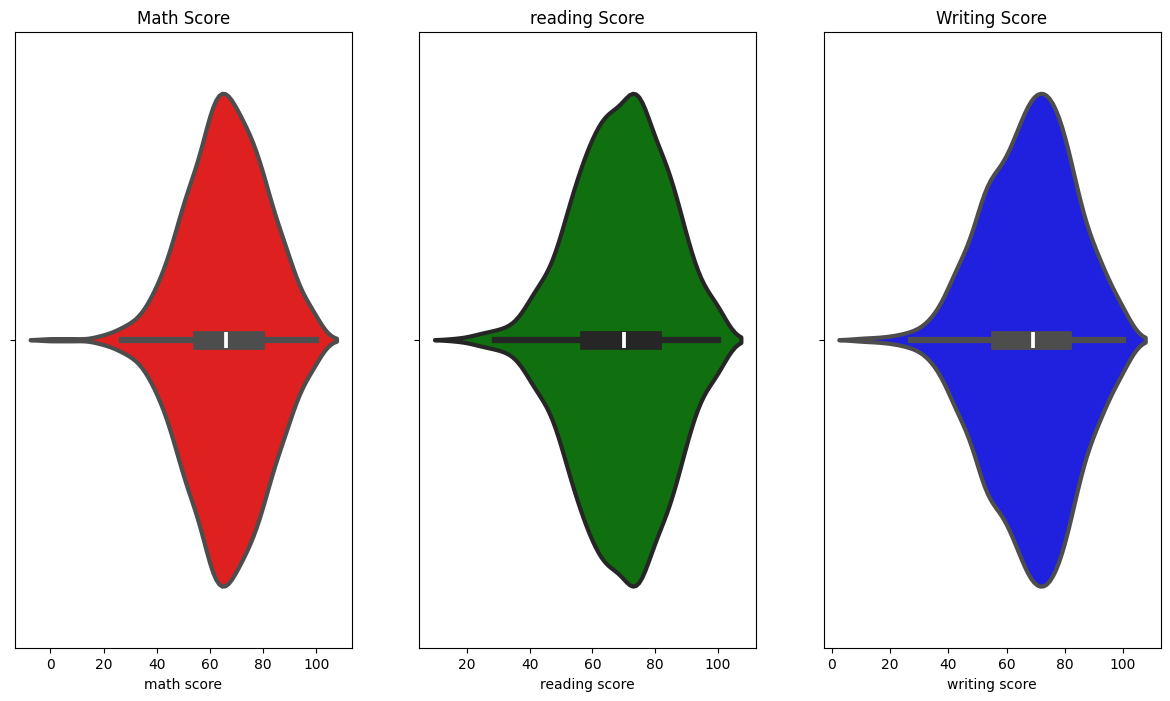

In [77]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(x='math score',data=df,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading Score')
sns.violinplot(x='reading score',data=df,color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(x='writing score',data=df,color='b',linewidth=3)


## 4.2 Multivariate Analysis

(-1.25, 1.25, -1.25, 1.25)

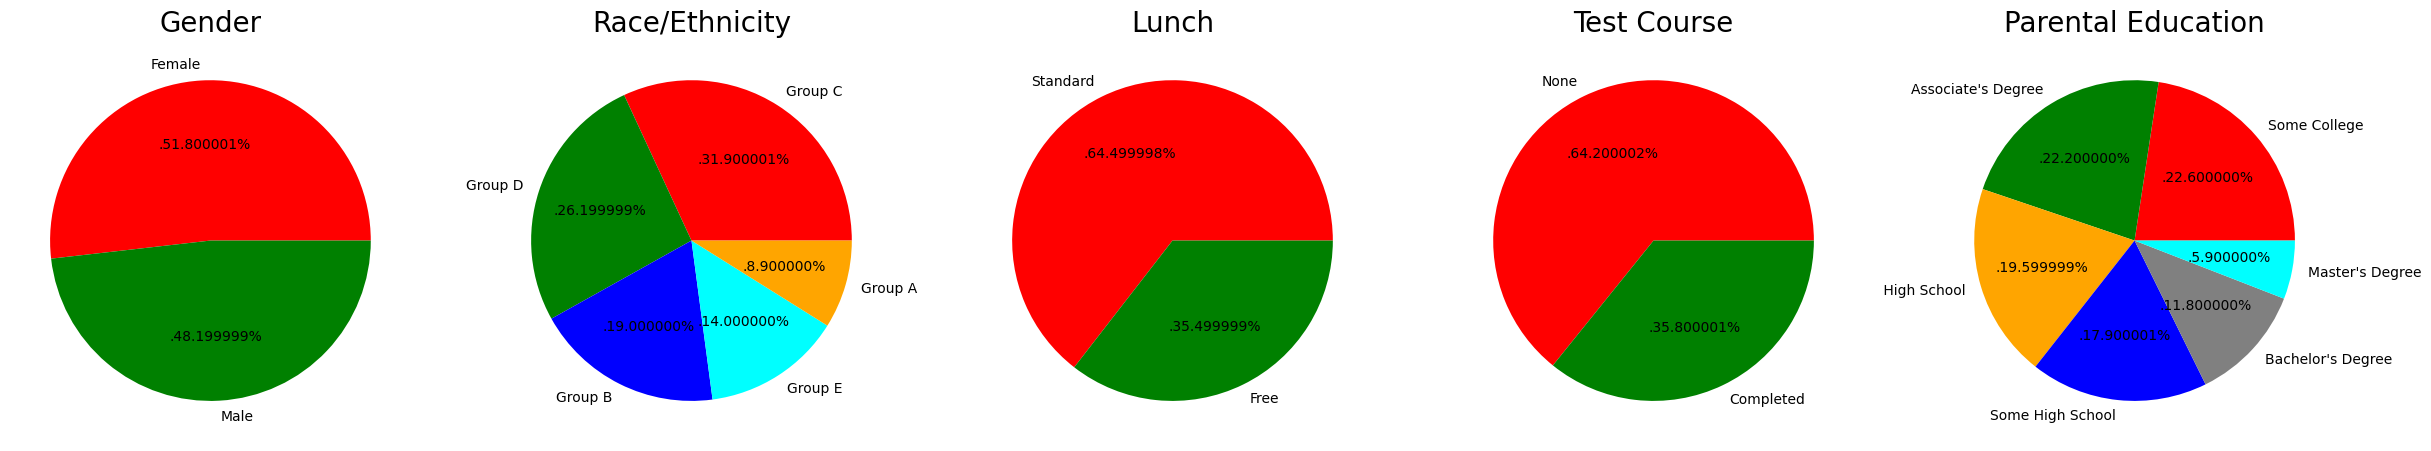

In [78]:
plt.rcParams['figure.figsize']=(30,8)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Gender",fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Race/Ethnicity",fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Lunch",fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Test Course",fontsize=20)
plt.axis('off')



plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels='Some College',"Associate's Degree"," High School",'Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','orange','blue','grey','cyan']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Parental Education",fontsize=20)
plt.axis('off')



## 4.2 Feature Wise Visualization

## Gender Column
   #### How is distribution os Gender?
   #### Does gender have any impact on student performance?
univariate analysis(Gender column)

([<matplotlib.patches.Wedge at 0x20010a5a700>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06782226650507357, -1.1980818587083752, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

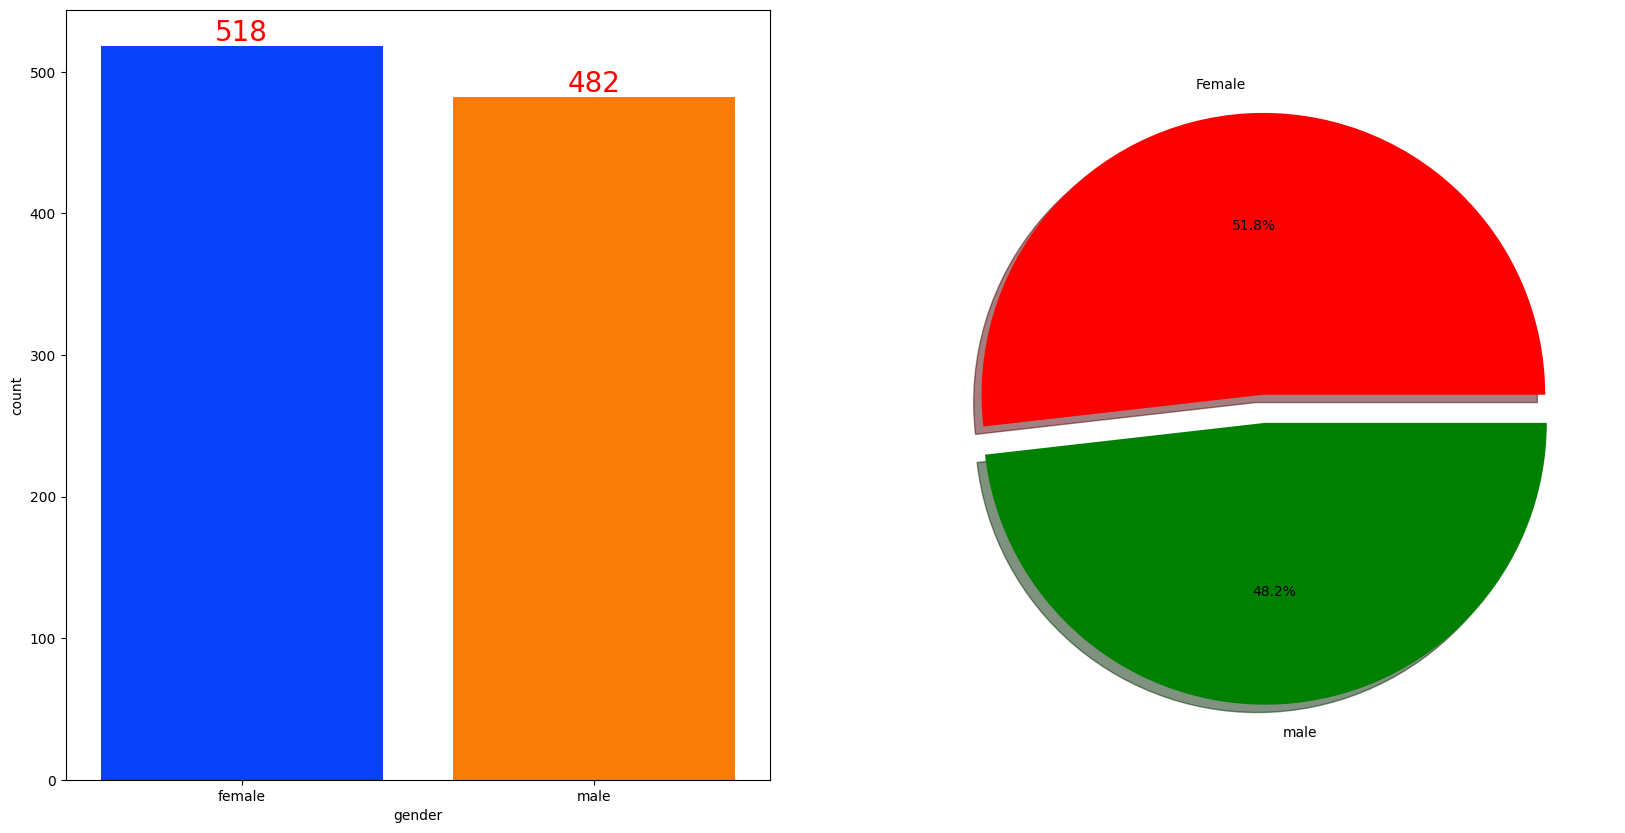

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0],saturation=0.95,palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='red',size=20)
plt.pie(x=df['gender'].value_counts(),labels=["Female","male"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,
        colors=["Red","Green"])    
    

              
        
            

### Insight
1.. In terms of overall performance Female scores are good then males
2.. but in math's male performed well


([<matplotlib.patches.Wedge at 0x20010970460>,
 [Text(0.6461719988148862, 1.0111685062083247, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3769336659753503, 0.5898482952881894, '31.9%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9%')])

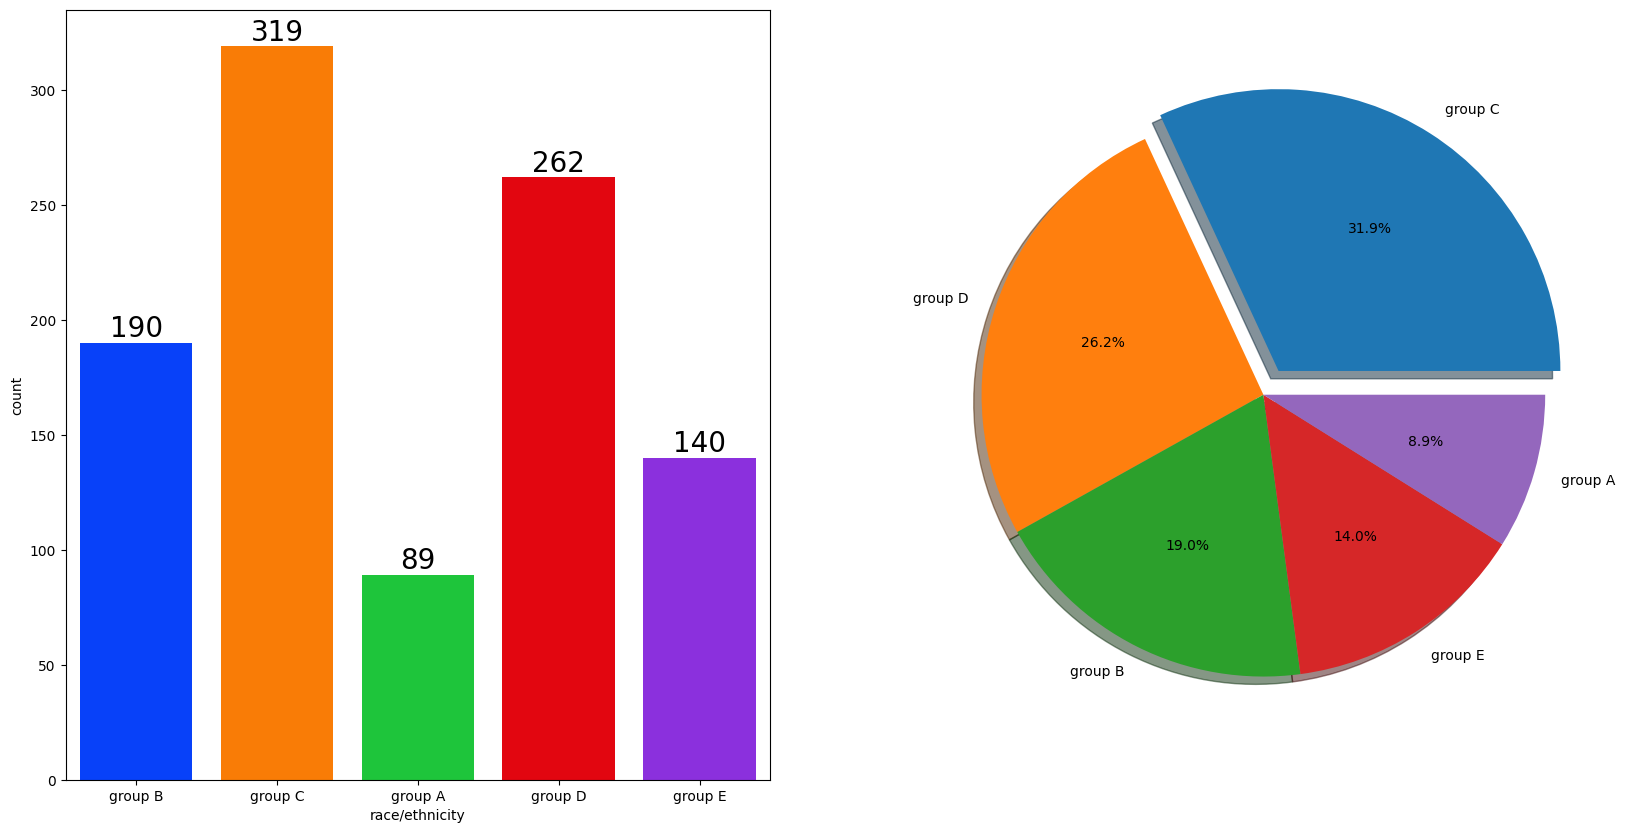

In [85]:
## Univariate analysis (how is group wise distribution)
#is Race/ethinicity has impact on student's performance?
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct=
       "%1.1f%%",shadow=True)

<Axes: xlabel='lunch', ylabel='writing score'>

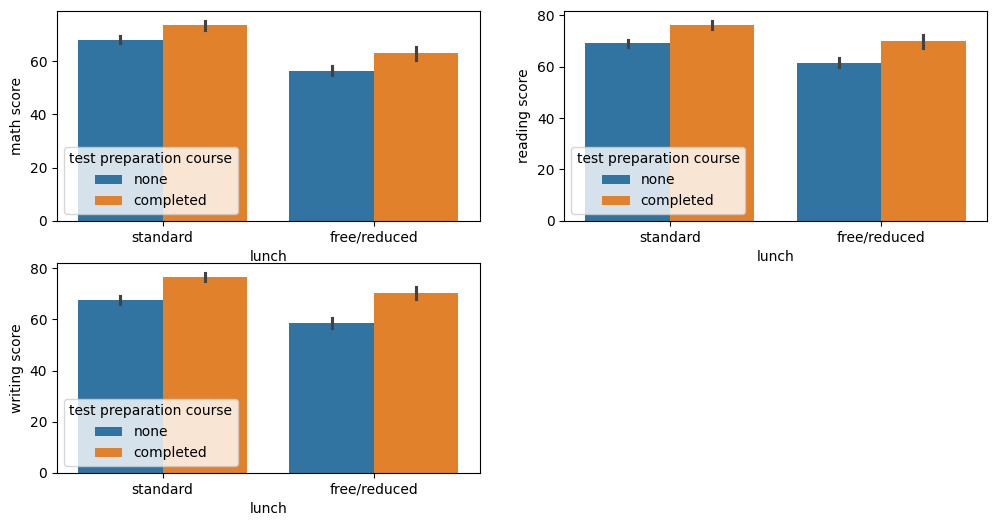

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])

plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])

plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])

##Insight
1.Gender has balanced data with Female students are 518(52%) and Male Students are 482(48%)

<Axes: ylabel='average'>

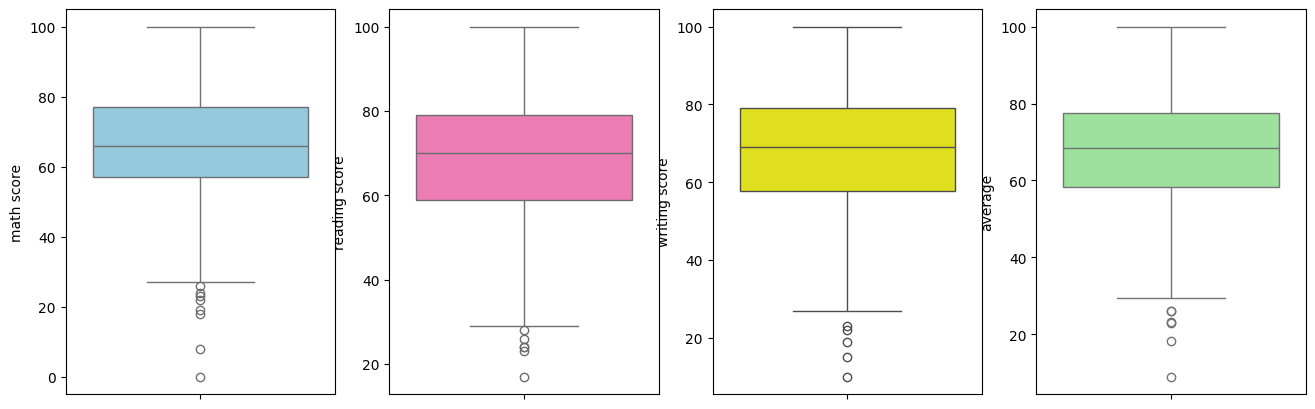

In [82]:
 ## Checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')


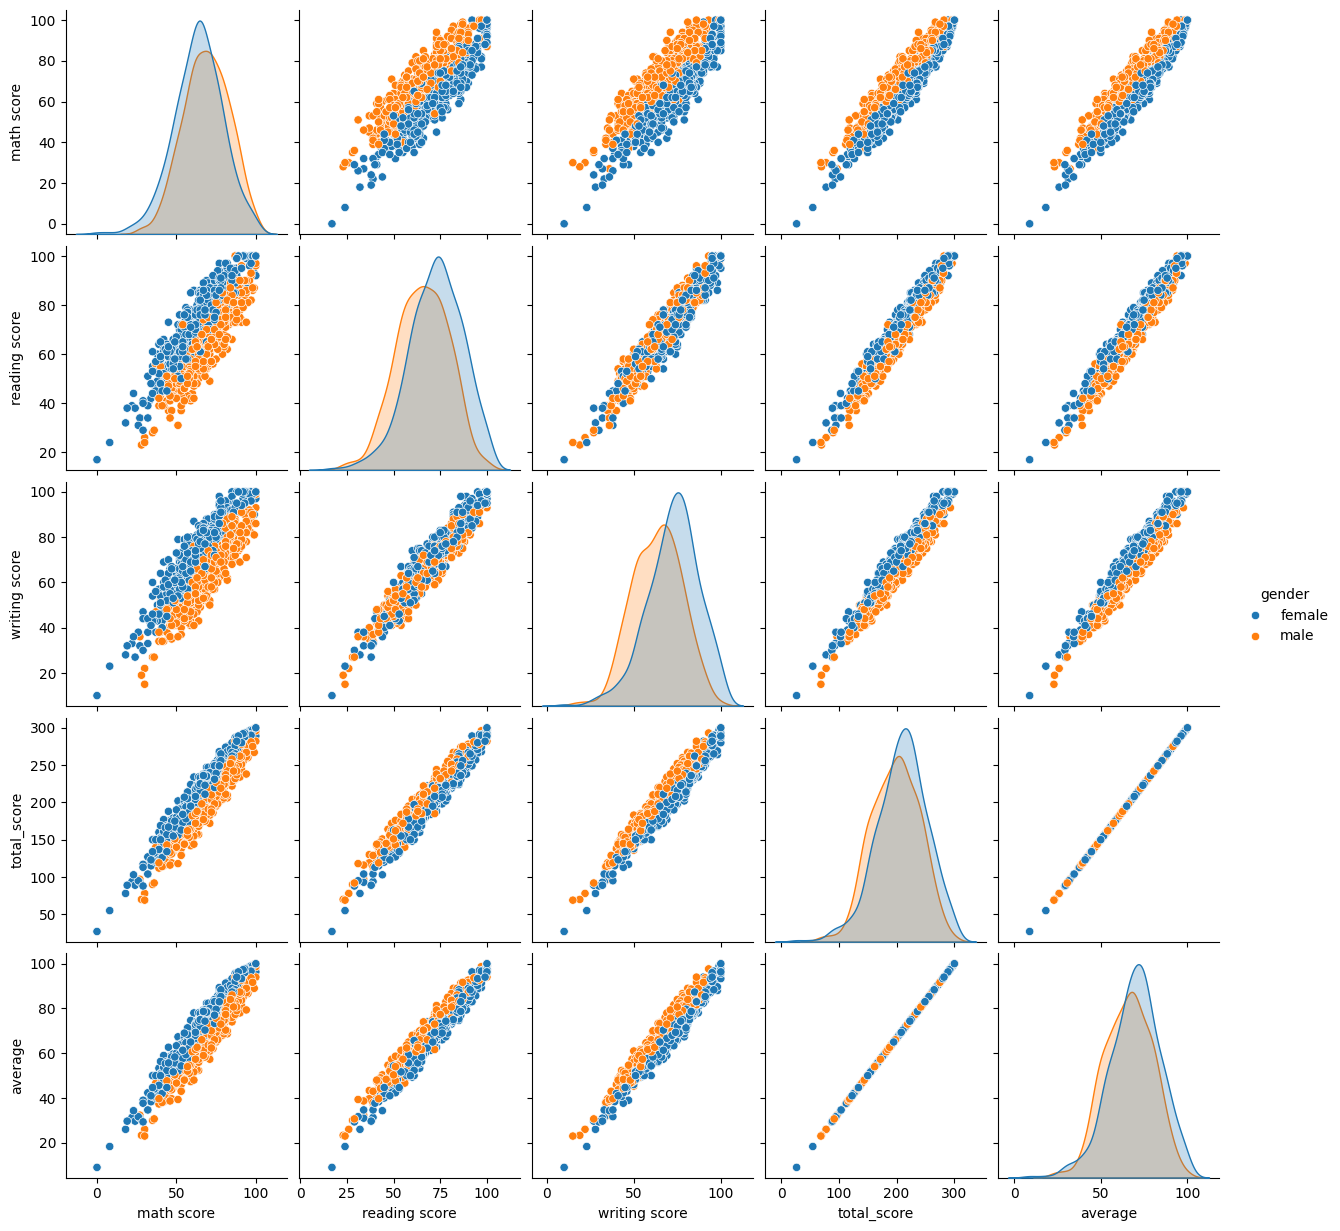

In [83]:
# multivariate analysis using pairplot
sns.pairplot(df,hue='gender')